# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
def data_parser():
  pass




############ Function Call ############
data_parser()

## Web Collection Requirement \#1


In [ ]:
def web_parser1():
  pass





############ Function Call ############
web_parser1()

## Web Collection Requirement #2

In [ ]:
def web_parser2():
  pass





############ Function Call ############
web_parser2()

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source:
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

## Insights

In [13]:
def insight1():
    """
    Insight 1:
    Calculates yearly crime totals for Los Angeles.
    """

    import pandas as pd

    # Load cleaned LA dataset inside the function
    df = pd.read_csv("Cleaned_Crime_Data_2020_to_Present.csv")

    df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")
    df = df.dropna(subset=["DATE OCC"])
    df["year"] = df["DATE OCC"].dt.year
    df = df[df["year"].isin([2020, 2021, 2022, 2023])]


    yearly_totals = df.groupby("year").size().reset_index(name="crime_count")
    return yearly_totals

############ Function Call ############
insight1()

,year,crime_count
0,2020,199847
1,2021,209876
2,2022,235259
3,2023,232345


### Insight 1 Explanation

Insert explanation here

In [28]:
def insight2():
    """
    Insight 2:
    Top 10 most common crime types in LA (2020–2023)
    """
    import pandas as pd

    df = pd.read_csv("Cleaned_Crime_Data_2020_to_Present.csv")

    df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")
    df = df.dropna(subset=["DATE OCC"])
    df["year"] = df["DATE OCC"].dt.year
    df = df[df["year"].isin([2020, 2021, 2022, 2023])]

    top10 = (df["Crm Cd Desc"].value_counts().head(10).reset_index())

    return top10


############ Function Call ############
insight2()

,Crm Cd Desc,count
0,VEHICLE - STOLEN,93674
1,BATTERY - SIMPLE ASSAULT,69421
2,THEFT OF IDENTITY,56216
3,BURGLARY FROM VEHICLE,53990
4,BURGLARY,53411
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",53141
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",49828
7,THEFT PLAIN - PETTY ($950 & UNDER),44898
8,INTIMATE PARTNER - SIMPLE ASSAULT,43717
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),33702


### Insight 2 Explanation

Insert explanation here

In [44]:
def insight3():
    import pandas as pd

    la = pd.read_csv("Cleaned_Crime_Data_2020_to_Present.csv")
    atl = pd.read_csv("Cleaned_FultonCrimeData.csv")

    la["DATE OCC"] = la["DATE OCC"].astype(str).str.split().str[0]
    la_parts = la["DATE OCC"].str.split("-", expand=True)
    la["Month"] = la_parts[0].astype(int)
    la["Year"]  = la_parts[2].astype(int)
    la = la[la["Year"].isin([2020, 2021, 2022, 2023])]

    la["Season"] = "Winter"
    la.loc[la["Month"].isin([3,4,5]), "Season"] = "Spring"
    la.loc[la["Month"].isin([6,7,8]), "Season"] = "Summer"
    la.loc[la["Month"].isin([9,10,11]), "Season"] = "Fall"

    la_counts = la.groupby("Season").size().reset_index(name="Count")
    la_counts["City"] = "Los Angeles"
    total_la = la_counts["Count"].sum()
    la_counts["Percent"] = (la_counts["Count"] / total_la) * 100

    atl["occurdate"] = atl["occurdate"].astype(str).str.split().str[0]
    atl_parts = atl["occurdate"].str.split("-", expand=True)
    atl["Month"] = atl_parts[0].astype(int)
    atl["Year"]  = atl_parts[2].astype(int)
    atl = atl[atl["Year"] == 2009]

    atl["Season"] = "Winter"
    atl.loc[atl["Month"].isin([3,4,5]), "Season"] = "Spring"
    atl.loc[atl["Month"].isin([6,7,8]), "Season"] = "Summer"
    atl.loc[atl["Month"].isin([9,10,11]), "Season"] = "Fall"

    atl_counts = atl.groupby("Season").size().reset_index(name="Count")
    atl_counts["City"] = "Atlanta"
    total_atl = atl_counts["Count"].sum()
    atl_counts["Percent"] = (atl_counts["Count"] / total_atl) * 100

    combined = pd.concat([la_counts, atl_counts], ignore_index=True)
    return combined
############ Function Call ############
insight3()

,Season,Count,City,Percent
0,Fall,220815,Los Angeles,25.169065
1,Spring,215697,Los Angeles,24.585702
2,Summer,224574,Los Angeles,25.597525
3,Winter,216241,Los Angeles,24.647708
4,Spring,392,Atlanta,43.029638
5,Summer,271,Atlanta,29.747530
6,Winter,248,Atlanta,27.222832


### Insight 3 Explanation

This insight compares how crime levels vary by season in Los Angeles and Atlanta. By extracting the month from each incident date and grouping them into the four seasons, we calculated the overall share of yearly crime occurring in each season for both cities. Los Angeles shows a very balanced seasonal pattern, with Spring, Summer, Fall, and Winter each contributing roughly 24–26% of total crime between 2020 and 2023. In contrast, Atlanta’s 2009 felony data displays a more uneven pattern, with Spring accounting for over 40% of crimes, followed by decreasing levels in Summer and Winter. This suggests that while Los Angeles experiences consistent crime patterns throughout the year, Atlanta’s felony activity may be more sensitive to seasonal factors. These differences highlight potential environmental, demographic, or policing-related influences on crime timing across cities

In [ ]:
def insight4():
  pass





############ Function Call ############
insight4()

### Insight 4 Explanation

Insert explanation here

In [ ]:
def insight5():
  pass





############ Function Call ############
insight5()

### Insight 5 Explanation

Insert explanation here

## Data Visualizations

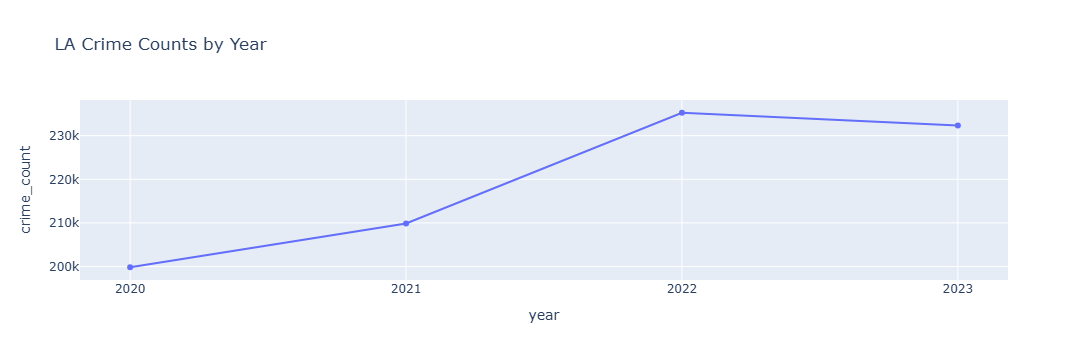

In [15]:
def visual1():
    yearly = insight1()
    yearly["year"] = yearly["year"].astype(str)

    # One-line Plotly visualization
    import plotly.express as px
    px.line(yearly, x="year", y="crime_count", title="LA Crime Counts by Year", markers=True).show()

############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

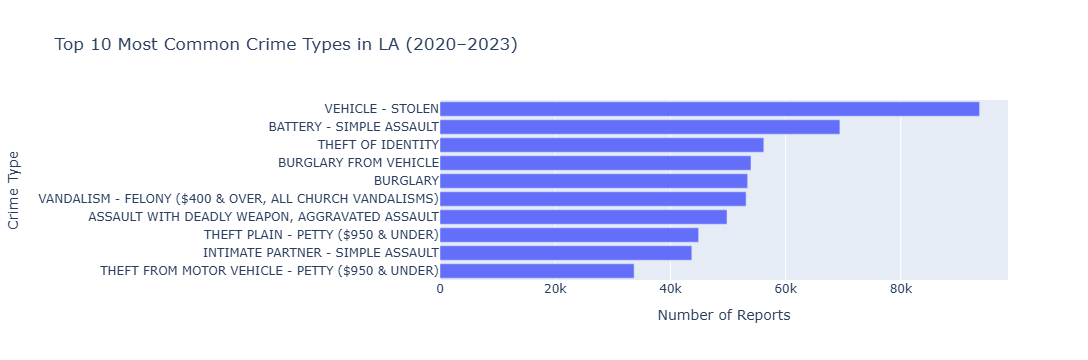

In [31]:
def visual2():
    # Use the result from Insight 2
    top10 = insight2()

    import plotly.express as px

    # Horizontal bar chart of top 10 crime types
    fig = px.bar(
        top10,
        x="count",
        y="Crm Cd Desc",
        orientation="h",
        title="Top 10 Most Common Crime Types in LA (2020–2023)"
    )

    fig.update_layout(
        xaxis_title="Number of Reports",
        yaxis_title="Crime Type",
        yaxis=dict(autorange="reversed")   # Highest bar on top
    )

    fig.show()


############ Function Call ############
visual2()

### Visualization 2 Explanation

Insert explanation here

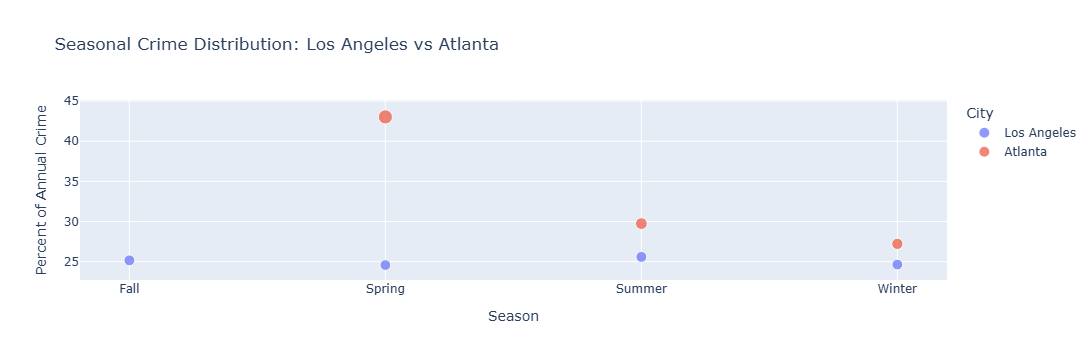

In [58]:
def visual3():
    import plotly.express as px

    df = insight3()

    fig = px.scatter(
        df,
        x="Season",
        y="Percent",
        color="City",
        size="Percent",
        size_max=10,        # << smaller dots (default ≈ 60)
        hover_name="Season",
        title="Seasonal Crime Distribution: Los Angeles vs Atlanta"
    )

    fig.update_layout(
        xaxis_title="Season",
        yaxis_title="Percent of Annual Crime"
    )

    fig.show()
############ Function Call ############
visual3()

### Visualization 3 Explanation

This visualization compares seasonal crime patterns in Los Angeles and Atlanta using a bubble-style scatter plot, where each point represents a season’s percentage of total annual crime for that city. The x-axis lists the four seasons, and the y-axis shows the percent contribution of each season to the yearly total. Bubble color distinguishes the cities, and bubble size reflects the magnitude of the seasonal percentage. The plot highlights that Los Angeles has an extremely balanced crime distribution across all four seasons, with each one contributing roughly 24–26% of annual crime. In contrast, Atlanta’s felony data shows a strong seasonal imbalance, with a large spike in spring and noticeably lower proportions in summer and winter. This visualization makes it easy to compare seasonal trends between the two cities and demonstrates how seasonal effects differ depending on the type of crime data available

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
